### Block 1
**The len() function returns the size (dimension)**
This one is pretty straight forward but will be necessary when doing any sort of vector arithmetic as in order to vector sums, multiplication, and inner products, the vectors need to be the same size. So it will always be good to do a check before attempting one of these operations

In [1519]:
# block 1, pg. 2
x = [-1.1, 0.0, 3.6, -7.2]
len(x)

4

In [1520]:
# additional context/code
def vectorAddition(x_list: list, y_list: list) -> list:
    if len(x_list) == len(y_list):
        xy_list = [] # initialize return list
        for x, y in zip(x_list, y_list): # zip allows iteration over both
            xy_list.append(x + y)
        return xy_list
    else:
        print(f"List's are not the same length. List 1: {len(x_list)}, List 2: {len(y_list)}")
        return [] # return empty list if can't do vector addition


y = [0, 1, 1, 1]
len(y)

print(vectorAddition(x, y))

[-1.1, 1.0, 4.6, -6.2]


### Block 2
I haven't seen or used number before. Main feature I see is that it can do the linear algebra vector operations, Important to note that it still uses 0 based indices like with other python arrays/lists, and not the linear algebra 1 base indices. 
The book also shows that len works the same, as does index assignment and that -1 is the last element like with normal lists. I wonder if slices work the same?

In [1521]:
# block 2, pg. 3
import numpy as np
x = np.array([-1.1, 0.0, 3.6, -7.2])
x[2] # array value at index 2

3.6

In [1522]:
print(len(x)) # length of array
x[2] = 20 # list index re-assignment
print(x)
print(x[-1]) # -1 index displays last value
print(x[1:3]) # slices work the same

4
[-1.1  0.  20.  -7.2]
-7.2
[ 0. 20.]


### Block 3
Here the book talks about vector equality. The first example shows basic aliasing. Arrays/lists in python are all passed by reference, so y = x is making it so both variables point to the same object. Numpy uses the same copy method as standard python arrays to do what is called a shallow copy or when two different array objects reference the same elements.

In the first, aliassing, what effects one, effects the other. In a shallow copy they are independent to the other's changes. Other's way to do a shallow copy include slicing and using a constructor, in Numpy's case, I wonder if this will also act the same.

In [1523]:
# import numpy as np # I comment out as, as already imported in previous block
x = np.array([-1.1, 0.0, 3.6, -7.2])
y = x # aliassing, x and y now refer to same object
x[2] = 20.0
print(y) # change to x effects y

[-1.1  0.  20.  -7.2]


In [1524]:
y[3] = 10
print("x: ", x) # change to y effects x

z = x.copy() # using copy method as in book, pg. 4
print("z: ", z)
z[1] = 2 # changing z
print("z: ", z)
print("x: ", x) # doesn't effect x

s = z[:] # checking to see if slice method works
print("s: ", s)
s[3] = -4 # changing s
print("s: ", s)
print("z: ", z)  # doesn't effect z

c = np.array(s) # for a list the syntax would be c = list(s), wonder if this works
print("c: ", c)
c[0] = 100 # changing c
print("c: ", c)
print("s: ", s)   # doesn't effect s

x:  [-1.1  0.  20.  10. ]
z:  [-1.1  0.  20.  10. ]
z:  [-1.1  2.  20.  10. ]
x:  [-1.1  0.  20.  10. ]
s:  [-1.1  2.  20.  10. ]
s:  [-1.1  2.  20.  -4. ]
z:  [-1.1  2.  20.  -4. ]
c:  [-1.1  2.  20.  -4. ]
c:  [100.   2.  20.  -4.]
s:  [-1.1  2.  20.  -4. ]


### Block 4
How numpy does equality is really cool. I believe in normal python arrays it just tests and returns whether the overall array's are the same and doesn't return the individual elements that are true/false. 

In [1525]:
# block 4, pg 4
# import numpy as np
x = np.array([-1.1, 0.0, 3.6, -7.2])
y = x.copy()
x == y

array([ True,  True,  True,  True])

In [1526]:
# testing how standard array equality works
x = [1, 2, 3, 4]
y = x.copy()
x == y
# just saw that this a block on the next page...

True

### Block 5
Here we are talking about stacked or blocked vectors. Where we have a vector of vectors. It's interesting they use the word concatenate, which I generally think of as adding two things end to end, like with string concatenation. While the book on page 6 says this creates a stacked vector, I'm confused by the output shown in the book, which looks like it just makes a new vector with 5 elements, not a new vector of 2 vectors one with 2 elements and one with 3. I know in python that arrays/lists can have other lists in them and that can be written easilty. I'm not sure what the benefit of this method is. 

In [1527]:
# import numpy as np
x = np.array([1, -2])
y = np.array([1,1,0])
z = np.concatenate((x,y))
print(z)

[ 1 -2  1  1  0]


- O: [ 1 -2  1  1  0]
- The output gives no indication that it's a vector of 2 vectors...

In [1528]:
a = [1, -2]
b = [1, 1, 0]
c = []
c.append(a)
c.append(b)
print(c)
d = [a, b]
print(d)

[[1, -2], [1, 1, 0]]
[[1, -2], [1, 1, 0]]


I would like that the above gives a better representation of a stacked vector. However the book says that c = [a, b] is not a stacked a vector. I wonder what z length's is...

In [1529]:
print(len(z))
print(len(c))
print(len(d))

5
2
2


I read some of the numpy documentation and there's a method called vstack that I think better represents how stacks are described in the book, especially there behavior pertaining to the inner product of blocks

In [1530]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# stacking vertically
stacked = np.vstack((v1, v2))

print("Stacked array:\n", stacked)
print("Stacked len:", len(stacked))
print("First vector:", stacked[0])
print("Second vector:", stacked[1])

print("Element at [0, 1]:", stacked[0, 1])  # First vector, second element

Stacked array:
 [[1 2 3]
 [4 5 6]]
Stacked len: 2
First vector: [1 2 3]
Second vector: [4 5 6]
Element at [0, 1]: 2


This behavious of numpy's stack method is more similar to creating an array of 2 arrays either through initialization or append than it is to the concantenate method the book says is how to create numpy stacked vectors. It honestly seems like concatenation is just adding the 2 vectors end on end. Though it does match the behaviour list on page 4 of the main book: 
a = (b1, b2, . . . , bm, c1, c2, . . . , cn, d1, d2, . . . , dp).
However, as shown below you wouldn't be able to use in an inner product calculation of 2 block/stacked vectors as it doesn't keep track of the lengths of the vectors that make it up.

In [1531]:
print(z[0])
print(z[1])

1
-2


### Block 6
Here we are talking about vectors of first differences. And I don't really understand what that means, or how we are getting the resulting vector d. The equation from pg. 7 states 
di = xi+1 − xi, for i = 1, . . . , n − 1, where x is an n-vector.

In [1532]:
#import numpy as np
x = np.array([1,8,3,2,1,9,7])
d = x[1:] - x[:-1]
print(d)

[ 7 -5 -1 -1  8 -2]


In [1533]:
print("x[1:]", x[1:])
print("x[:-1]", x[:-1])

x[1:] [8 3 2 1 9 7]
x[:-1] [1 8 3 2 1 9]


Okay, seeing the slices clears it up. 

### Block 7
Here we have a pyplot, which I've used once or twice before. Looking at the graph, I'm seeing that the x coordinates are coming through by default as the index values of the elements in the temps vector. In the context of this graph the hours (48) for 2 days worth of data. I wonder how I can manipulate the x-scale and if I could save multiple graphs to the same pdf?

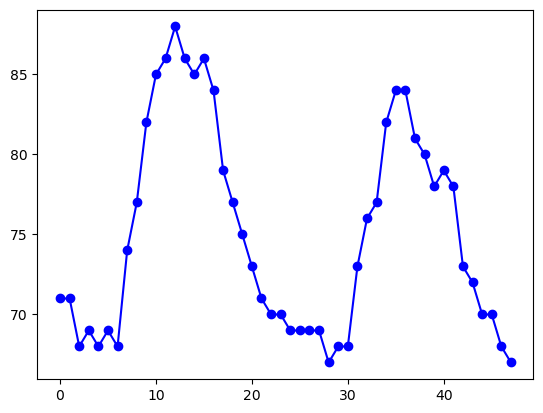

In [1534]:
import matplotlib.pyplot as plt
plt.ion()
temps = [ 71, 71, 68, 69, 68, 69, 68, 74, 77, 82, 85, 86, 88, 86,
85, 86, 84, 79, 77, 75, 73, 71, 70, 70, 69, 69, 69, 69, 67,
68, 68, 73, 76, 77, 82, 84, 84, 81, 80, 78, 79, 78, 73, 72,
70, 70, 68, 67 ]
plt.plot(temps, '-bo')
plt.savefig('temperature.pdf', format = 'pdf')
plt.show()

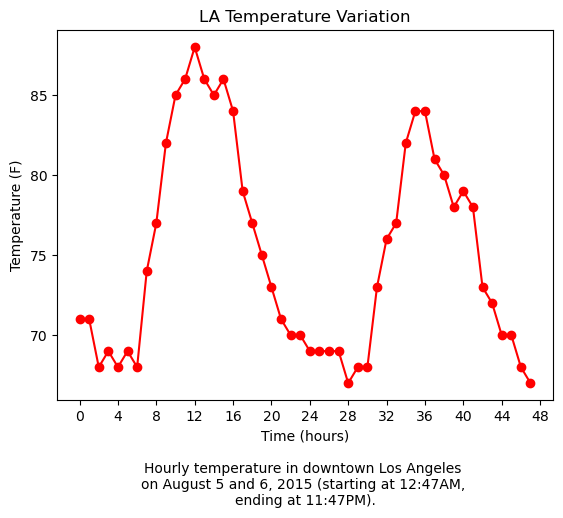

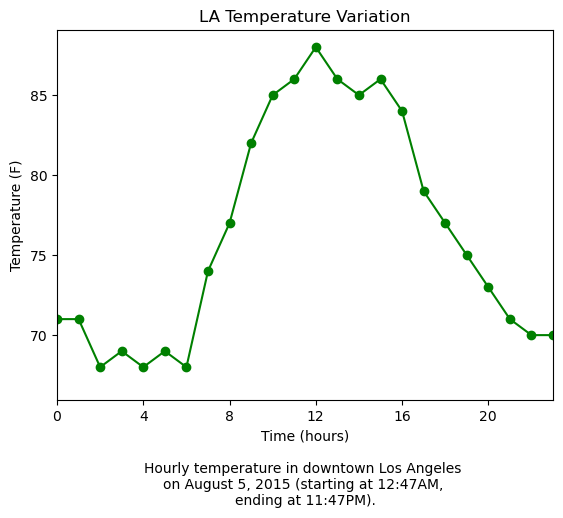

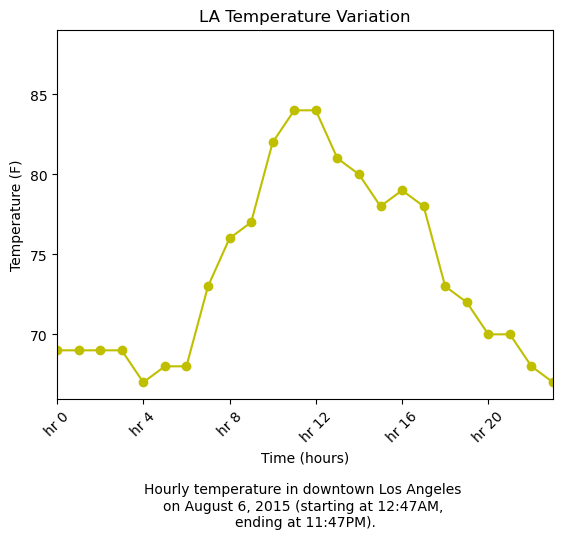

In [1535]:
from matplotlib.backends.backend_pdf import PdfPages # this will allow multiple figures to be saved to one pdf
with PdfPages('multiple_figures.pdf') as pdf:
    plt.figure()
    plt.plot(temps, "-ro")
    t_pos = range(0, len(temps) +1, 4) # changing x ticks to inc by 4 for clarity of hours
    #t_lab = [f"hr {i}" for i in range(0, len(temps) + 1, 4)]
    plt.xticks(t_pos)
    #plt.xticks(rotation=45)
    plt.xlabel("Time (hours)\n\nHourly temperature in downtown Los Angeles \non August 5 and 6, 2015 (starting at 12:47AM, \nending at 11:47PM).")
    plt.ylabel("Temperature (F)")
    plt.title("LA Temperature Variation")
    pdf.savefig()
    plt.show()

    plt.figure()
    plt.plot(temps, "-go")
    t_pos = range(0, 23, 4) # changing x ticks to inc by 4 for clarity of hours
    plt.xticks(t_pos)
    plt.xlim(0, 23)
    plt.xlabel("Time (hours)\n\nHourly temperature in downtown Los Angeles \non August 5, 2015 (starting at 12:47AM, \nending at 11:47PM).")
    plt.ylabel("Temperature (F)")
    plt.title("LA Temperature Variation")
    pdf.savefig()
    plt.show()

    plt.figure()
    plt.plot(temps, "-yo")
    t_pos = range(24, 47, 4) # changing x ticks to inc by 4 for clarity of hours
    t_lab = [f"hr {i-24}" for i in t_pos]
    plt.xticks(t_pos, t_lab)
    plt.xticks(rotation=45)
    plt.xlim(24, 47)
    plt.xlabel("Time (hours)\n\nHourly temperature in downtown Los Angeles \non August 6, 2015 (starting at 12:47AM, \nending at 11:47PM).")
    plt.ylabel("Temperature (F)")
    plt.title("LA Temperature Variation")
    pdf.savefig()
    plt.show()

### Block 8
Not much to say about this one, besides it's cool that numpy does operator override to do this, instead of a method call. Already created a vector addition function in block 1, so am going to create a vector subtraction function for standard lists. I wonder what numpy does when x and y aren't the same length.

In [1536]:
#import numpy as np
x = np.array([1,2,3])
y = np.array([100,200,300])
print('Sum of arrays:', x+y)
print('Difference of arrays:', x-y)

Sum of arrays: [101 202 303]
Difference of arrays: [ -99 -198 -297]


In [1537]:
z = np.array([1, 90, -50, 80])
try:
    print('Sum of arrays:', x+z)
    print('Difference of arrays:', z-y)
except ValueError as e:
    print(f"Error: {e}")


Error: operands could not be broadcast together with shapes (3,) (4,) 


In [1538]:
def vectorSubtraction(x_list: list, y_list: list) -> list:
    if len(x_list) == len(y_list):
        xy_list = [] # initialize return list
        for x, y in zip(x_list, y_list): # zip allows iteration over both
            xy_list.append(x - y)
        return xy_list
    else:
        print(f"List's are not the same length. List 1: {len(x_list)}, List 2: {len(y_list)}")
        return [] # return empty list if can't do vector addition
x = [1, 2, 3]
y = [100, 200, 300]
z = [5, 6]
print("Sum of Arrays:", vectorAddition(x, y))
print(vectorAddition(y, z))
print("Difference of Arrays:", vectorSubtraction(x, y))
print(vectorSubtraction(x, z))

print("NUMPY IS THE BEST, THEY AIN'T NO HUMPTY DUMPTY")

Sum of Arrays: [101, 202, 303]
List's are not the same length. List 1: 3, List 2: 2
[]
Difference of Arrays: [-99, -198, -297]
List's are not the same length. List 1: 3, List 2: 2
[]
NUMPY IS THE BEST, THEY AIN'T NO HUMPTY DUMPTY


### Block 9, 10, 11
Here I'm considering 3 blocks at one time one block. Again cool how convenient everything thing is operand overload. Gonna try and implement my own for the fun.

In [1539]:
# import numpy as np
x = np.array([1,2,3])
print('array:', x, 'scalar', 2.2)
print('scalar mult:', 2.2*x)

# import numpy as np
x = np.array([1,2,3])
print('scalar div:', x/2.2)

# import numpy as np
x = np.array([1,2,3,4])
print('scalar add:', x + 2.2)

array: [1 2 3] scalar 2.2
scalar mult: [2.2 4.4 6.6]
scalar div: [0.45454545 0.90909091 1.36363636]
scalar add: [3.2 4.2 5.2 6.2]


In [1540]:
scl = 2.2
arr = [1, 2, 3]
def scalarArrayMult(scl, arr: list) -> list: #scl could be int or float so not labelled
    ret_arr = []
    for i in range(0, len(arr)):
        ret_arr.append(arr[i] * scl)
    return ret_arr

print(scalarArrayMult(scl, arr))

def scalarArrayDiv(scl, arr: list) -> list:
    ret_arr = []
    for i in range(0, len(arr)):
        ret_arr.append(arr[i] / scl)
    return ret_arr

print(scalarArrayDiv(scl, arr))

def scalarArrayAdd(scl, arr: list) -> list:
    ret_arr = []
    for i in range(0, len(arr)):
        ret_arr.append(arr[i] + scl)
    return ret_arr

print(scalarArrayAdd(scl, arr))

def scalarArraySub(scl, arr: list) -> list:
    ret_arr = []
    for i in range(0, len(arr)):
        ret_arr.append(arr[i] - scl)
    return ret_arr

print(scalarArraySub(scl, arr))

[2.2, 4.4, 6.6000000000000005]
[0.45454545454545453, 0.9090909090909091, 1.3636363636363635]
[3.2, 4.2, 5.2]
[-1.2000000000000002, -0.20000000000000018, 0.7999999999999998]
